# So Sánh 2 Model trong Clustering

## I. CÁC BƯỚC CHUẨN BỊ

### 1. Khai báo thư viện

In [ ]:

import numpy as np # Tính toán với mảng, thống kê...
import matplotlib.pyplot as plt # Vẽ biểu đồ linh hoạt tùy biến
import seaborn as sns # Vẽ biểu đồ thống kê dựa vào matplotlib

from IPython.display import display # print

from sklearn.model_selection import train_test_split # tách dữ liệu tập train/test
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # tiêu chí đánh giá
from sklearn.compose import ColumnTransformer, make_column_selector as selector # tiền xử lý cột trước khi pipline
from sklearn.preprocessing import OneHotEncoder, StandardScaler # chuẩn hóa cột về trung bình 0 và độ lệch 1

from sklearn.impute import SimpleImputer # bù khuyết mean/median, ....
from sklearn.pipeline import Pipeline # tạo pipline đễ dàng sử dụng API

from sklearn.linear_model import LinearRegression # model Linear
from sklearn.ensemble import RandomForestRegressor # model RandomForest

import joblib # lưu và đọc các mô hình

### 2. Nạp dữ liệu

In [ ]:
import pandas as pd # Xử lý dữ liệu bảng (lọc nhóm, gộp, missing vaules)
Wine_df = pd.read_csv("../../dataset/winequality-red.csv") # Sử dụng pandas và dùng read_csv để đọc dữ liệu csv
Wine_df.head() # hiển thị 5 rows đầu tiên của dataset, head(default = 5)winequality-red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

**Nhận xét:**
- Cột "Unnamed:0" là cột đánh số thứ tự, cho nên chuyển cột này thành cột index. Trước khi chuyển thì cần phải thay đổi tên cột để dễ nhìn

In [5]:
# đổi tên cột 
housing_price_df = housing_price_df.rename(columns={"Unnamed: 0": "Unnamed"})
# đưa cột Unnamed thành index
housing_price_df.set_index(housing_price_df["Unnamed"], inplace= True) #inlace = True chỉnh trực tiếp trong dataset
housing_price_df.drop("Unnamed", axis = 1, inplace= True) # axis = 1: xét theo chiều ngang (đi qua các cột)
housing_price_df

Address      Zip     Price  Area  \
Unnamed                                                                    
1                  Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0    64   
2        Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0    60   
3                    Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   109   
4                  Tenerifestraat 40, Amsterdam  1060 TH  580000.0   128   
5                    Winterjanpad 21, Amsterdam  1036 KN  720000.0   138   
...                                         ...      ...       ...   ...   
920                         Ringdijk, Amsterdam  1097 AE  750000.0   117   
921             Kleine Beerstraat 31, Amsterdam  1033 CP  350000.0    72   
922           Stuyvesantstraat 33 II, Amsterdam  1058 AK  350000.0    51   
923       John Blankensteinstraat 51, Amsterdam  1095 MB  599000.0   113   
924          S. F. van Ossstraat 334, Amsterdam  1068 JS  300000.0    79   

         Room       Lon        Lat  
Unnamed                             
1           3  4.907736  52.356157  
2           3  4.850476  52.348586  
3           4  4.944774  52.343782  
4           6  4.789928  52.343712  
5           5  4.902503  52.410538  
...       ...       ...        ...  
920         1  4.927757  52.354173  
921         3  4.890612  52.414587  
922         3  4.856935  52.363256  
923         4  4.965731  52.375268  
924         4  4.810678  52.355493  

[924 rows x 7 columns]

**Nhận xét:**
- Sau khi rename, set_index và drop cột để chuyển thì ta đã có được các cột hoàn chỉnh.

### 3. Phân tích dữ liệu 

#### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [ ]:
# shape 
print(f'+ Shape: {housing_price_df.shape}')
# types
print(f'+ Data Types: \n{housing_price_df.dtypes}')
# info
housing_price_df.info()

+ Shape: (924, 7)
+ Data Types: 
Address     object
Zip         object
Price      float64
Area         int64
Room         int64
Lon        float64
Lat        float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 1 to 924
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 57.8+ KB


***Nhận xét:**
+ Dữ liệu có 6 tính chất để phân lớp: $Address$, $Zip$, $Area$, $Room$, $Lon$ và $Lat$
+ Tổng số dòng dữ liệu là 924 dòng
+ Dữ liệu để phân lớp ở cột $Price$ 

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [ ]:
# check null
has_null = housing_price_df.isnull().sum().any() # tính tổng dữ liệu bất kỳ dữ liệu null
# check nan
has_nan  = housing_price_df.isna().sum().any() #tính tổng dữ liệu bất kỳ dữ liệu nan

print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display(housing_price_df[housing_price_df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display(housing_price_df[housing_price_df.isna().any(axis=1)])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True


Address      Zip  Price  Area  Room       Lon  \
Unnamed                                                                       
74        Falckstraat 47 A, Amsterdam  1017 VV    NaN   147     3  4.897454   
322      Haarlemmerweg 705, Amsterdam  1067 HP    NaN   366    12  4.787874   
611      Zeeburgerkade 760, Amsterdam  1019 HT    NaN   107     3  4.945022   
728         Suikerplein 16, Amsterdam  1013 CK    NaN    81     3  4.880976   

               Lat  
Unnamed             
74       52.360707  
322      52.383877  
611      52.369244  
728      52.389623

+ Có giá trị Nan: True


Address      Zip  Price  Area  Room       Lon  \
Unnamed                                                                       
74        Falckstraat 47 A, Amsterdam  1017 VV    NaN   147     3  4.897454   
322      Haarlemmerweg 705, Amsterdam  1067 HP    NaN   366    12  4.787874   
611      Zeeburgerkade 760, Amsterdam  1019 HT    NaN   107     3  4.945022   
728         Suikerplein 16, Amsterdam  1013 CK    NaN    81     3  4.880976   

               Lat  
Unnamed             
74       52.360707  
322      52.383877  
611      52.369244  
728      52.389623

**Nhận xét**:
+ Dữ liệu bị trùng có giá trị rỗng (NaN, Null)
+ Các dòng dữ liệu bị rỗng sẽ ở Room = 3 và 12

### 4. Tiền xử lý

In [8]:
# đếm số lượng nhà có 3 phòng
count_room_3 = (housing_price_df["Room"] == 3).sum()
display(f"Số nhà có 3 phòng: {count_room_3}")
count_room_12 = (housing_price_df["Room"] == 12).sum()
display(f"Số nhà có 12 phòng: {count_room_12}")

'Số nhà có 3 phòng: 333'

'Số nhà có 12 phòng: 1'

**Nhận xét:**
- Đối với phòng 3 do số lượng thiếu chỉ có 3 mà tổng số lượng ngôi nhà có room = 3 là 333, cho nên thay các dữ liệu thiếu bằng median.
- Room = 12 chỉ có duy nhất một dòng, điều này cho thấy tỷ lệ nhà có 12 phòng cực ít nên loại bỏ dòng này. 

In [9]:
# Giải quyết nhà có 3 phòng
cols_to_fill = ["Price"] # cột missing data
mask = (housing_price_df["Room"] == 3)
medians_r3 = housing_price_df.loc[mask, cols_to_fill].median(numeric_only=True) # chỉ tính với giá trị số
# chọn đúng dòng và cột cần fill và thực hiện gán giá trị NaN thành giá trị median đã tính trước đó.
housing_price_df.loc[mask, cols_to_fill] = housing_price_df.loc[mask, cols_to_fill].fillna(medians_r3)
# Giải quyết nhà có 12 phòng
housing_price_df = housing_price_df[housing_price_df["Room"] != 12].reset_index(drop=True) # sau khi xóa dòng thì điều chỉnh lại thứ tự index 0->n-1

In [10]:
has_null = housing_price_df.isnull().sum().any()
has_nan  = housing_price_df.isna().sum().any()
n_duplicated = housing_price_df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display(housing_price_df[housing_price_df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False


**Nhận xét:**
- Sau khi đã xử lý nhà có 3 phòng và 12 phòng thì dữ liệu không còn giá trị thiếu.

### 5. Mối tương quan giữa các tính chất (Correlations)

In [11]:
housing_price_df.dtypes

Address     object
Zip         object
Price      float64
Area         int64
Room         int64
Lon        float64
Lat        float64
dtype: object

**Nhận xét:**
- Trong bộ dữ liệu có 7 cột, tuy nhiên trong xây dựng mô hình chỉ hiểu các kiểu dữ liệu số. 

In [12]:
housing_price_df_int = housing_price_df[["Price", "Area","Room", "Lon","Lat"]]
housing_price_df_int.head()

Price  Area  Room       Lon        Lat
0  685000.0    64     3  4.907736  52.356157
1  475000.0    60     3  4.850476  52.348586
2  850000.0   109     4  4.944774  52.343782
3  580000.0   128     6  4.789928  52.343712
4  720000.0   138     5  4.902503  52.410538

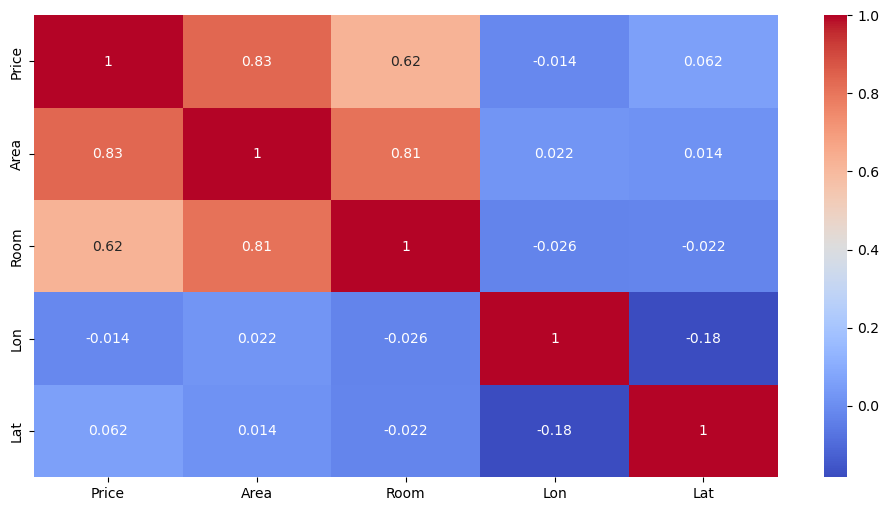

In [13]:
plt.figure(figsize=(12, 6)) #Create canvas
sns.heatmap(housing_price_df_int.corr(), annot= True, cmap="coolwarm") # annot để hiển thị số và cmap để hiển thị màu
plt.show() 

**Nhận xét:**
- Trong sơ đồ heatmap, các cột $Area$ $(0.83)$, $Room$ $(0.62)$ có tương quan mạnh với $Price$. Cho nên 2 cột này là yếu tố chính ảnh hưởng đến giá nhà.

### 6. Hiển thị nhiều tính chất (Multivariate Plots)

array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Area', ylabel='Price'>,
        <Axes: xlabel='Room', ylabel='Price'>,
        <Axes: xlabel='Lon', ylabel='Price'>,
        <Axes: xlabel='Lat', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='Area'>,
        <Axes: xlabel='Area', ylabel='Area'>,
        <Axes: xlabel='Room', ylabel='Area'>,
        <Axes: xlabel='Lon', ylabel='Area'>,
        <Axes: xlabel='Lat', ylabel='Area'>],
       [<Axes: xlabel='Price', ylabel='Room'>,
        <Axes: xlabel='Area', ylabel='Room'>,
        <Axes: xlabel='Room', ylabel='Room'>,
        <Axes: xlabel='Lon', ylabel='Room'>,
        <Axes: xlabel='Lat', ylabel='Room'>],
       [<Axes: xlabel='Price', ylabel='Lon'>,
        <Axes: xlabel='Area', ylabel='Lon'>,
        <Axes: xlabel='Room', ylabel='Lon'>,
        <Axes: xlabel='Lon', ylabel='Lon'>,
        <Axes: xlabel='Lat', ylabel='Lon'>],
       [<Axes: xlabel='Price', ylabel='Lat'>,
        <Axes: xlabel='Area', ylab

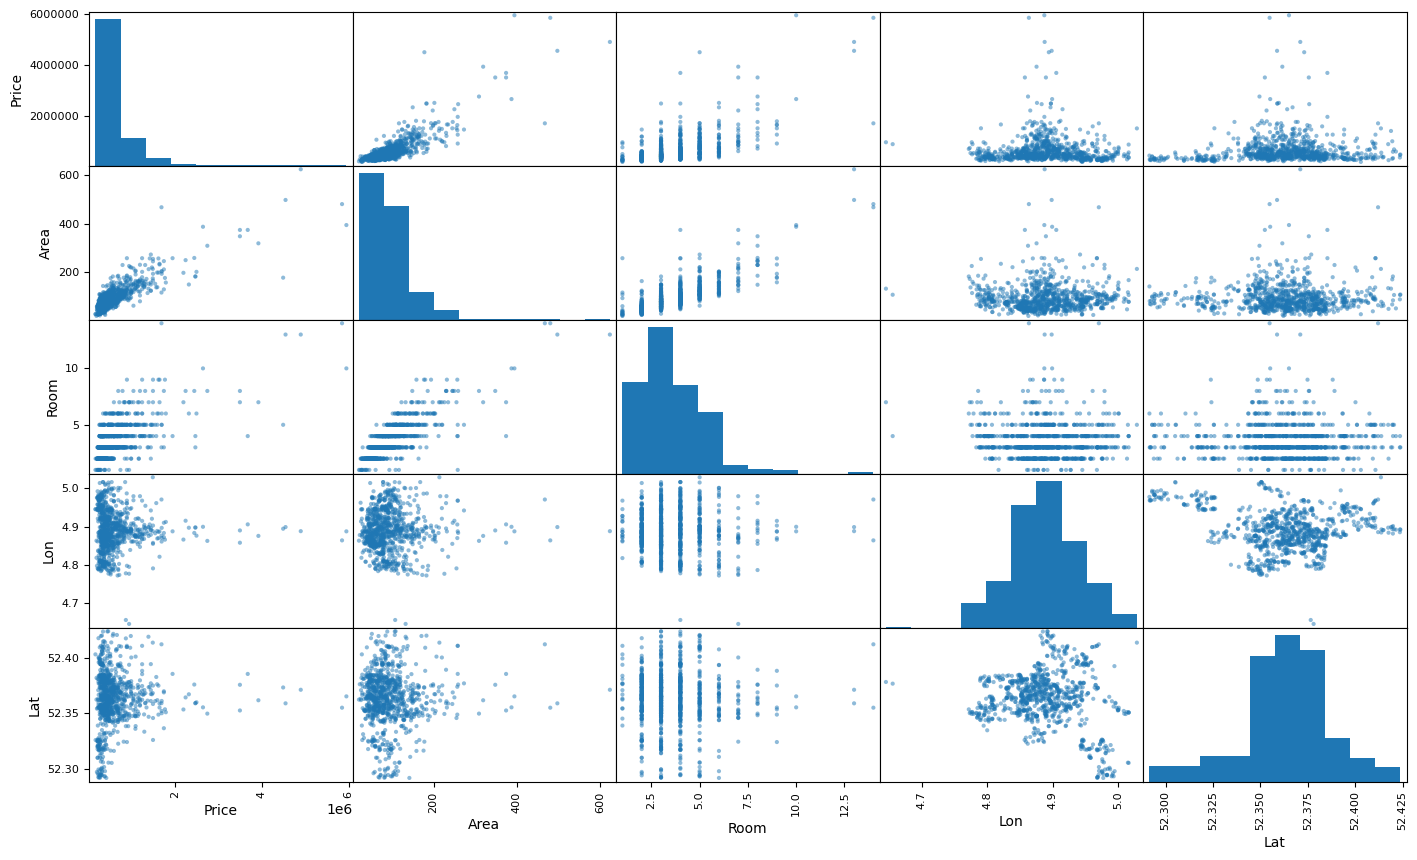

In [14]:
pd.plotting.scatter_matrix(housing_price_df_int, figsize=(17,10))

**Nhận xét:**
- Với việc hiển thị nhiều tính chất thì càng làm rõ mối tương quan giữa các biến ảnh hưởng đến giá nhà.

## II. Thực hiện xây dựng model

### 1. Lựa chọn cột features và target

In [15]:
# Chọn các cột feature và target phù hợp
X = housing_price_df_int[["Area","Room"]] #features
y = housing_price_df_int["Price"] #target

### 2. Tách dataset để train và test 

In [16]:
# tách test_size (độ rộng tập test) là 20% của toàn bộ dữ liệu, random_state giúp giữ nghiên dữ liệu sau khi tách, giúp đảm bảo độ chính xác
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [17]:
# show X train
X_train.head()

Area  Room
97     68     3
227    80     2
692    75     3
587    57     2
883    87     4

In [18]:
# show y train
y_train.head()

97     425000.0
227    520000.0
692    675000.0
587    345000.0
883    650000.0
Name: Price, dtype: float64

### 3. Preprocess

In [19]:
# tránh trường hợp thay đổi tên cột ở X
num_sel = selector(dtype_include=np.number) # chọn cột số 
cat_sel = selector(dtype_exclude=np.number) # chọn cột không phải số

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler())
])
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot",  OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_sel),
    ("cat", categorical_pipe, cat_sel),
])

### 3. Khởi tạo tham số cho model

In [ ]:
from sklearn.linear_model import LinearRegression # model Linear
from sklearn.ensemble import RandomForestRegressor # model RandomForest

# tạo pipline đóng gói toàn bộ model
def make_pipe(model):
    return Pipeline([("prep", preprocess), ("model", model)]) # prep học tham số tiền xử lý từ X_train (median để điền khuyết) và model học quy luật dự đoán

# cài đặt parameter cho model, 
models = {
    "RandomForest": RandomForestRegressor(max_depth=3, n_jobs=-1, n_estimators= 300),
    "Linear":       LinearRegression(fit_intercept=True, copy_X=False, positive=False)
}

**Nhận xét:**
- Model Linear:
    - fit_intercept=True sẽ thêm hệ số lệch (bias), chỉ False khi dữ liệu có cột bị bias tuy nhiên có thể giảm R2
    - copy_X = True để sao chép dữ liệu X, giúp X không bị thay đổi trước khi model học. Tuy nhiên nếu Flase sẽ tiết kiệm RAM nhưng X sẽ bị ghi đè
    - positive=False chuyển hệ số β luôn dương khi có ràng buộc miền giá trị, dễ diễn giải nhưng có thểm giảm R2

- Model RandomForest:
    - n_estimators là số lượng cây dược random, số lượng càng nhiều sẽ giảm phương sai nhưng tốn thời gian và RAM.
    - n_jobs để quy định tuyến trình chạy khi fit/predict:
        - n_jobs = 1 or None (chạy 1 luồng) dành cho Dataset nhỏ và chạy rất nhanh.
        - n_jobs = -1 (dùng toàn bộ core) khi muốn giảm thiểu thời gian học số lượng nhiều của model
        - n_jobs = n (n > 1) chỉ sài n core CPU, giúp giới hạn và nhẹ máy
        - n_jobs = -n (n < -1) chừa vài core để tránh việc máy quá tải

### 4. Đánh giá model

In [21]:
rows = []
for name, mdl in models.items():
    pipe = make_pipe(mdl).fit(X_train, y_train) # train model
    y_pred = pipe.predict(X_test) # kết quả sau khi train
    
    # Đánh giá
    mae = mean_absolute_error(y_test, y_pred) #y_test gia tri thuc, y_pre cho danh gia
    mse = mean_squared_error(y_test, y_pred) # loss model (*) > mae = dao ham () -> Xác định một biến nó tăng/ giảm ở một thời điểm nhất định 
    rmse = np.sqrt(mse) # root mean square
    r2 = r2_score(y_test, y_pred)
    
    #
    rows.append({
    "Model": name,
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2": r2
    })
      
results_df = (pd.DataFrame(rows).loc[:, ["Model", "MAE", "MSE", "RMSE", "R2"]].sort_values("RMSE", ascending=True))
# xuat
with pd.option_context("display.float_format", lambda x: f"{x:,.3f}"):
    display(results_df)

Model         MAE                MSE        RMSE    R2
1        Linear 181,496.387 64,945,961,457.735 254,844.975 0.793
0  RandomForest 181,424.505 70,384,280,579.919 265,300.359 0.776

In [22]:
def predict_price(area_m2, rooms):
    X_new = pd.DataFrame({"Area": [area_m2], "Room": [rooms]}) # fit col[area] 
    return pipe.predict(X_new) # print array, had [0] or item()
print(predict_price(100,3))

[688328.96534247]


### 5. Lưu model

In [23]:
joblib.dump(lin_pipe, "../../../models/regression.joblib") # lưu model đã train vào folder models
print("Saved: model/regressor.joblib") # in ra thông báo nếu lưu thành công

NameError: name 'lin_pipe' is not defined

# 1.1.3. Bài tập thực hành 1: Phân tích khám phá về chất lượng rượu vang đỏ (Red Wine Quality)


## 1. Định nghĩa vấn đề (Define Problem)
- **Mô tả**:
    - Tập “Red Vinho Verde” (Bồ Đào Nha) thuộc bộ Wine Quality gốc UCI, được mirror trên Kaggle. Dữ liệu chỉ gồm thử nghiệm hoá lý và điểm cảm quan “quality”.
+ **Dữ liệu vào**:
    - fixed acidity - axit cố định 
    - volatile acidity - axit bay hơi
    - citric acid - axit citric
    - residual sugar - đường dư 
    - chlorides - Ion Clorua
    - free sulfur dioxide - SO2 chưa liên kết 
    - total sulfur dioxide - Tổng SO2 
    - density - khối lượng riêng của rượu
    - pH - mức đô axit/bazo của rượu
    - sulphates - hàm lượng ion sunfat trong rượu
    - alcohol - lượng ethanol theo thể tích trong rượu
+ **Kết quả**: quality (3-8)

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [ ]:
# Importing all import python libraries
import pandas as pd
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2. Nạp dữ liệu (Load Dataset)

In [ ]:
import pandas as pd
winequality_df = pd.read_csv("winequality-red.csv")
winequality_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

- Edit those columns (ex: fixed acidity -> fixed_acidity )

### 2.3. Thay đổi tên cột (Columns name change)

In [ ]:
# winequality_df = winequality_df.rename(columns={"fixed acidity": "fixed_acidity"}) #single

cols_to_fix = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "free sulfur dioxide", "total sulfur dioxide"]
def normalize_selected_cols(df, cols):
    mapping = {c:c.strip().lower().replace(" ", "_") for c in cols}
    return df.rename(columns = mapping)

winequality_df = normalize_selected_cols(winequality_df, cols_to_fix)
winequality_df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [ ]:
# shape
print(f'+ Shape: {winequality_df.shape}')
# head, tail
print(f'+ Contents: ')
display.display(winequality_df.head(5))
display.display(winequality_df.tail(5))
# info
winequality_df.info()

+ Shape: (1599, 12)
+ Contents: 


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Nhận xét**:
+ •	Dữ liệu có 11 tính chất để phân lớp: Fixed acidity (g/L), Volatile acidity (g/L), Citric acid (g/L), Residual sugar (g/L), Chlorides (g/L), Free sulfur dioxide (mg/L), Total sulfur dioxide (mg/L)(mg/L), Density (g/cm³), pH, Sulphates (g/L), Alcohol (%)    
+ Tổng số dòng dữ liệu là 1599 dòng
+ Dữ liệu để target ở cột **quality** 

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [ ]:
has_null = winequality_df.isnull().sum().any()
has_nan  = winequality_df.isna().sum().any()
n_duplicated = winequality_df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(winequality_df[winequality_df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(winequality_df[winequality_df.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')

if n_duplicated > 0:
    n_duplicated_rows = winequality_df[winequality_df.duplicated(keep=False)]
    display.display(n_duplicated_rows)

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 240


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.700         0.00             1.9      0.076   
9               7.5             0.500         0.36             6.1      0.071   
11              7.5             0.500         0.36             6.1      0.071   
22              7.9             0.430         0.21             1.6      0.106   
...             ...               ...          ...             ...        ...   
1567            7.2             0.695         0.13             2.0      0.076   
1579            6.2             0.560         0.09             1.7      0.053   
1581            6.2             0.560         0.09             1.7      0.053   
1592            6.3             0.510         0.13             2.3      0.076   
1596            6.3             0.510         0.13             2.3      0.076   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
4                    11.0                  34.0  0.99780  3.51       0.56   
9                    17.0                 102.0  0.99780  3.35       0.80   
11                   17.0                 102.0  0.99780  3.35       0.80   
22                   10.0                  37.0  0.99660  3.17       0.91   
...                   ...                   ...      ...   ...        ...   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1579                 24.0                  32.0  0.99402  3.54       0.60   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
0         9.4        5  
4         9.4        5  
9        10.5        5  
11       10.5        5  
22        9.5        5  
...       ...      ...  
1567     10.1        5  
1579     11.3        5  
1581     11.3        5  
1592     11.0        6  
1596     11.0        6  

[460 rows x 12 columns]

**Nhận xét**:
+ Dữ liệu có 244 bị trùng và không có giá trị rỗng (NaN, Null)

Xu lý:
winequality_df = winequality_df.drop_duplicates(keep="first").reset_index(drop=True)


#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [ ]:
winequality_df.describe().T

count       mean        std      min      25%  \
fixed_acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile_acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric_acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual_sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free_sulfur_dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total_sulfur_dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed_acidity          7.90000   9.200000   15.90000  
volatile_acidity       0.52000   0.640000    1.58000  
citric_acid            0.26000   0.420000    1.00000  
residual_sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free_sulfur_dioxide   14.00000  21.000000   72.00000  
total_sulfur_dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

**Nhận xét**:
+ fixed_acidity (7.9 < 8.32), volatile_acidity (0.52 < 0.528), citric_acid (0.26 < 0.27), residual_sugar (2.2 < 2.54), chlorides (0.08 < 0.09), free_SO2 (14 < 15.9), total_SO2 (38 < 46.47), sulphates (0.62 < 0.66), alcohol (10.2 < 10.42) → nhiều biến có khả năng đuôi phải. </br>
+ density (0.9), pH (3.3) → cân bằng </br>
+ quality (6 > 5.63) → có khả năng lệch trái

## 4. EDA and DATA VISUALIZATION

### 1. **Mối tương quan giữa các tính chất (Correlations)**

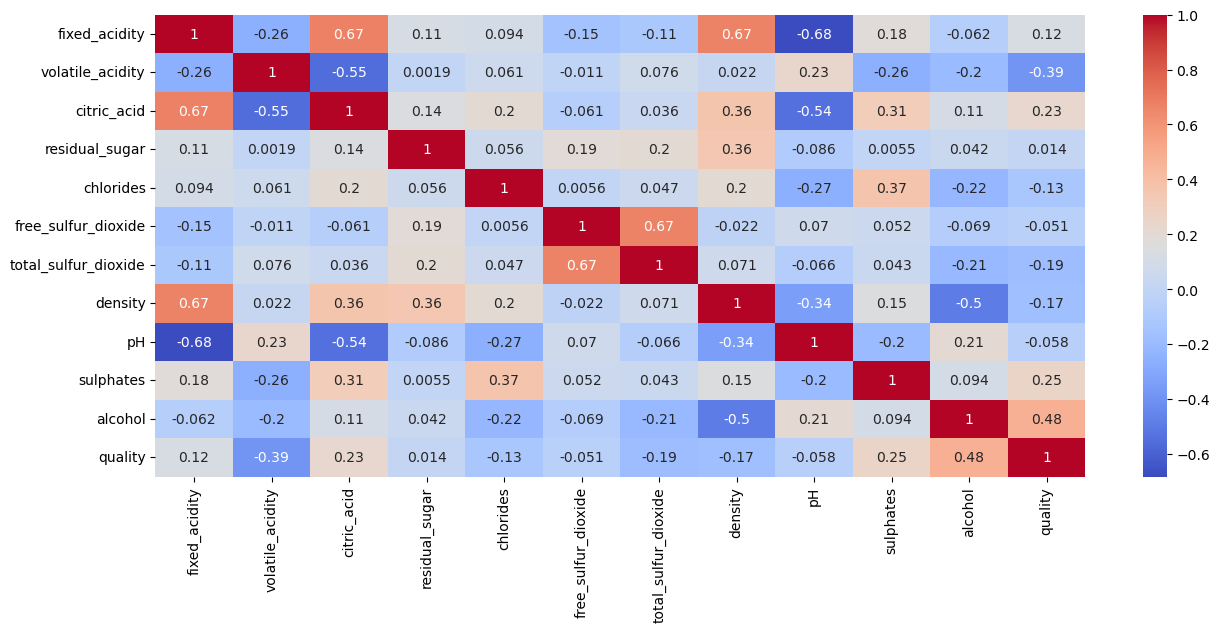

In [ ]:
plt.figure(figsize=(15, 6)) #Create canvas
sns.heatmap(winequality_df.corr(), annot= True, cmap="coolwarm")
plt.show() 

**Nhận xét:** </br>
- Có nhiều cột tương quan dương rõ rệt như:
    - fixed_acidity - citric_acid (0.67)
    - fixed_acidity - density (0.67)
    - citric_acid - density (0.36)
    - citric_acid - sulphates (0.31)
    - residual_sugar - density (0.36)
    - chlorides - sulphates (0.37)
    - totalSO2 - freeSO2 (0.67)
    - alocohol - quality (0.48)
- Bên cạnh đó cũng có các cột tương quan âm:
    - fixed_acidity - pH (-0.68)
    - ctric_acid - volatile_acidity (-0.55)
    - ctric_acid - pH (-0.54)
    - density - alcohol (-0.5)
    - density - pH (-0.34)
    - volatile_acidity - quality (-0.39)

### 2. Các biểu đồ

1) Boxplot

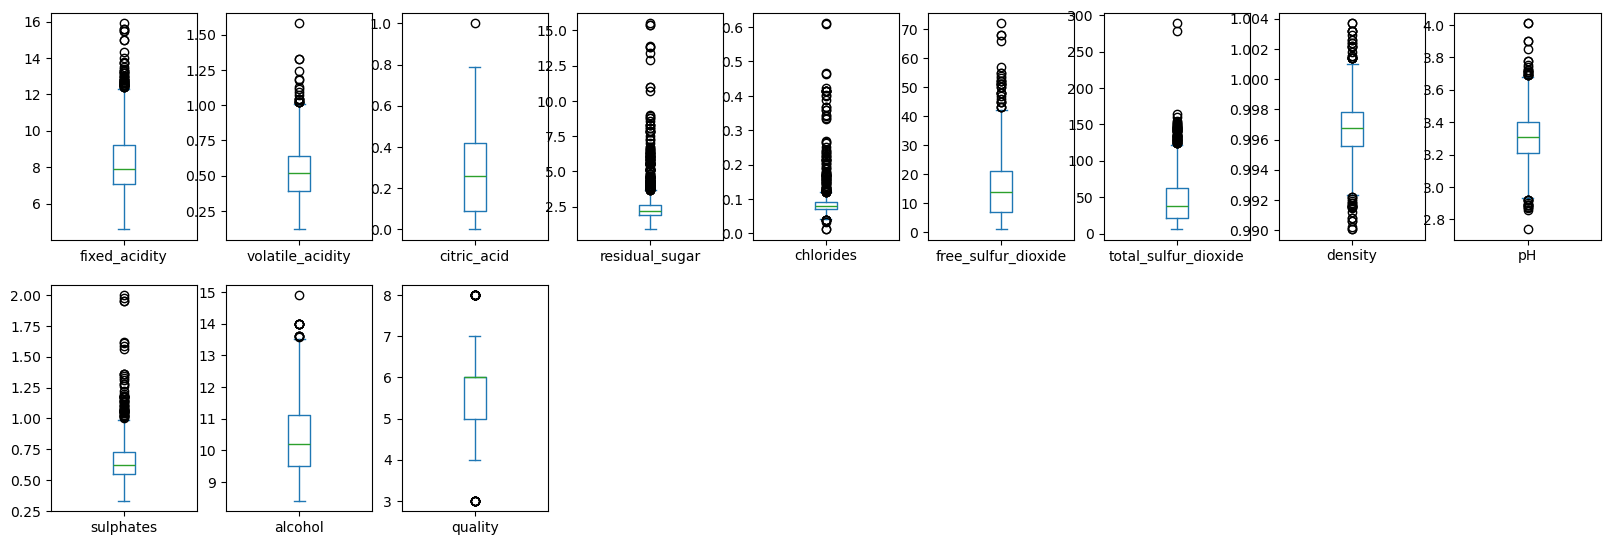

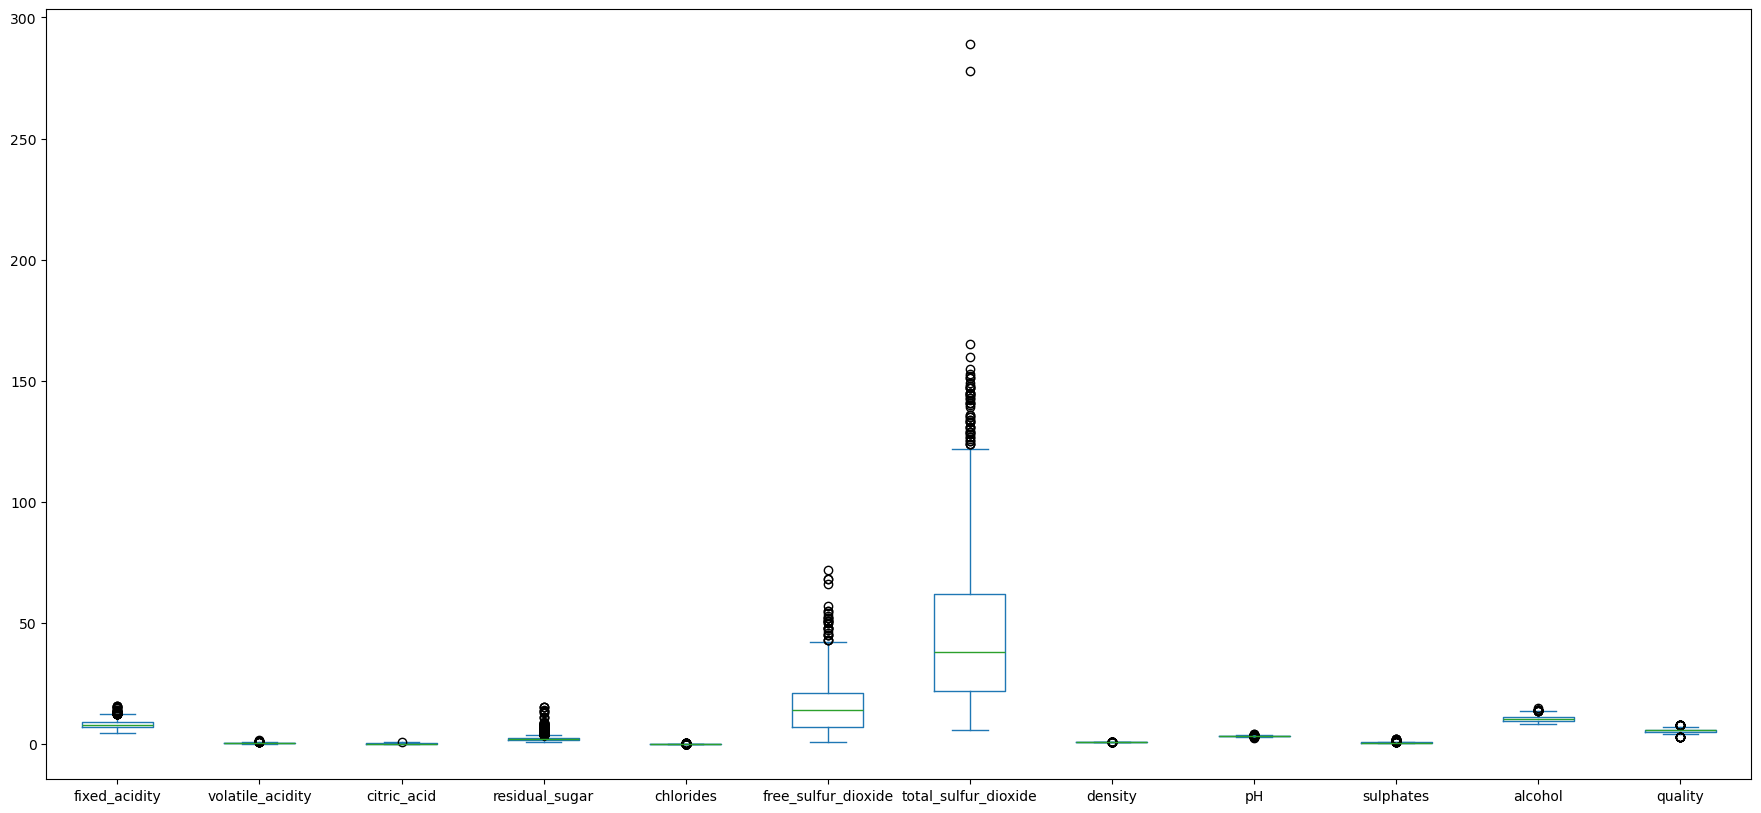

In [ ]:
cols_f = winequality_df.iloc[:, :12]
cols_f.plot(kind="box", subplots=True, layout=(3, 9), sharex=False, sharey=False, figsize=(20,10))
cols_f.plot(kind="box", figsize=(22,10))
plt.savefig("abc.pdf")

**Nhận xét:**
- Ngoại trử citric_acid ra các yếu tố khác đều có rất nhiều giá trị outlier, khiến chúng bị lệch phải và trái nhiều

2) Histogram


**Nhận xét:**
- Từ biểu đồ của fixed_acidity, volatile_acidity và citric_acid ta thấy rằng độ phân bố bị lệch phải 
- Tuy nhiên với biểu đồ fixed_acidity lại cân đối khi có 1 đỉnh, 2 biểu đồ còn lại thì xuất hiện nhiều đỉnh
1. Đối với fixed_acidity các giá trị nằm trong khoảng $[7-8]$
2. Đối với volatile_acidity các giá trị nằm trong khoảng $[0.4 - 0.7]$
3. Đối với citric_acid các giá trị nằm trong khoảng $[0.0 - 0.1]$

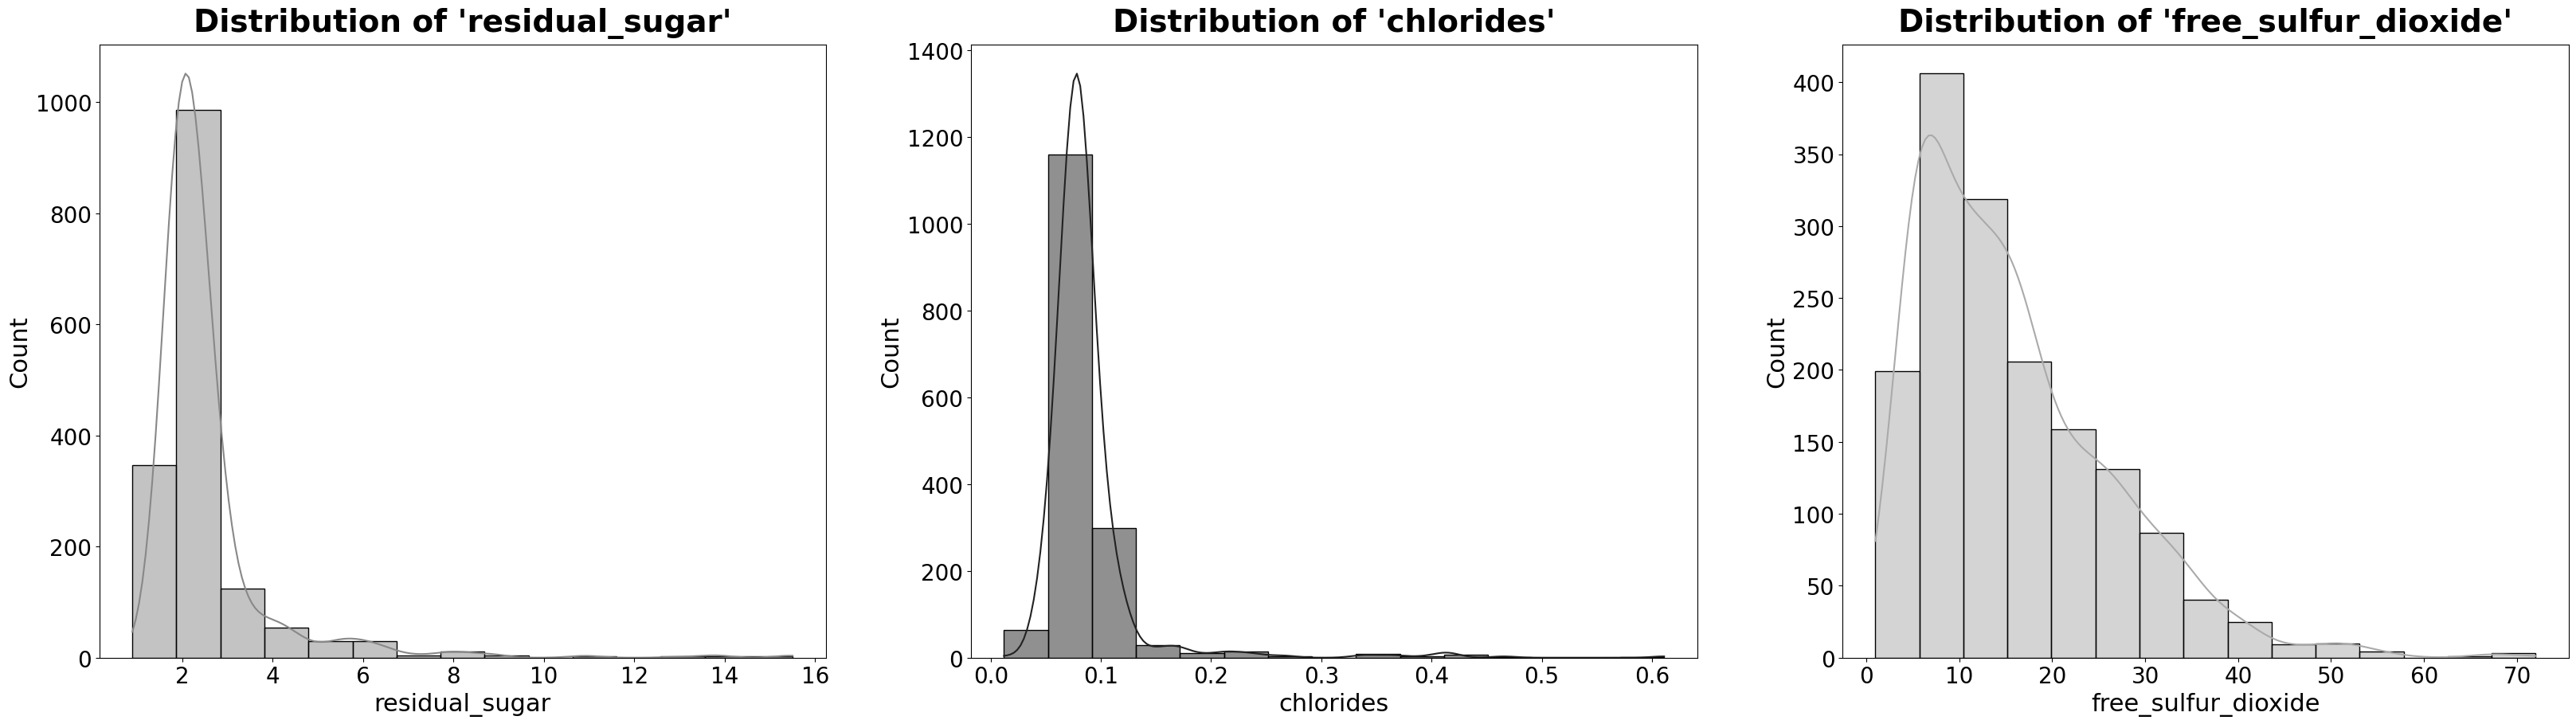

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))
sns.histplot(ax = axes[0], x = winequality_df["residual_sugar"],
             bins = 15,
             kde = True,
             cbar = True,
             color = "#888888").set(title = "Distribution of 'residual_sugar'")

sns.histplot(ax = axes[1], x = winequality_df["chlorides"],
             bins = 15,
             cbar = True,
             kde = True,
             color = "#222222").set(title = "Distribution of 'chlorides'")

sns.histplot(ax = axes[2], x = winequality_df["free_sulfur_dioxide"],
             bins = 15,
             kde = True,   
             cbar = True,
             color = "#AAAAAA").set(title = "Distribution of 'free_sulfur_dioxide'")

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=22)
    ax.set_ylabel(ax.get_ylabel(), fontsize=22)
    ax.set_title(ax.get_title(), fontsize=28, fontweight="bold", pad=12)

**Nhận xét:**
- Từ biểu đồ của residual_sugar, chlorides và free_sulfur_dioxide ta thấy rằng độ phân bố bị lệch phải 
- Tuy nhiên cả 3 biểu đồ này đều khá cân đối
1. Đối với residual_sugar các giá trị nằm trong khoảng $[1 - 2.5]$
2. Đối với chlorides các giá trị nằm trong khoảng $[0.085 - 0.15]$
3. Đối với free_sulfur_dioxide các giá trị nằm trong khoảng $[0 - 15]$

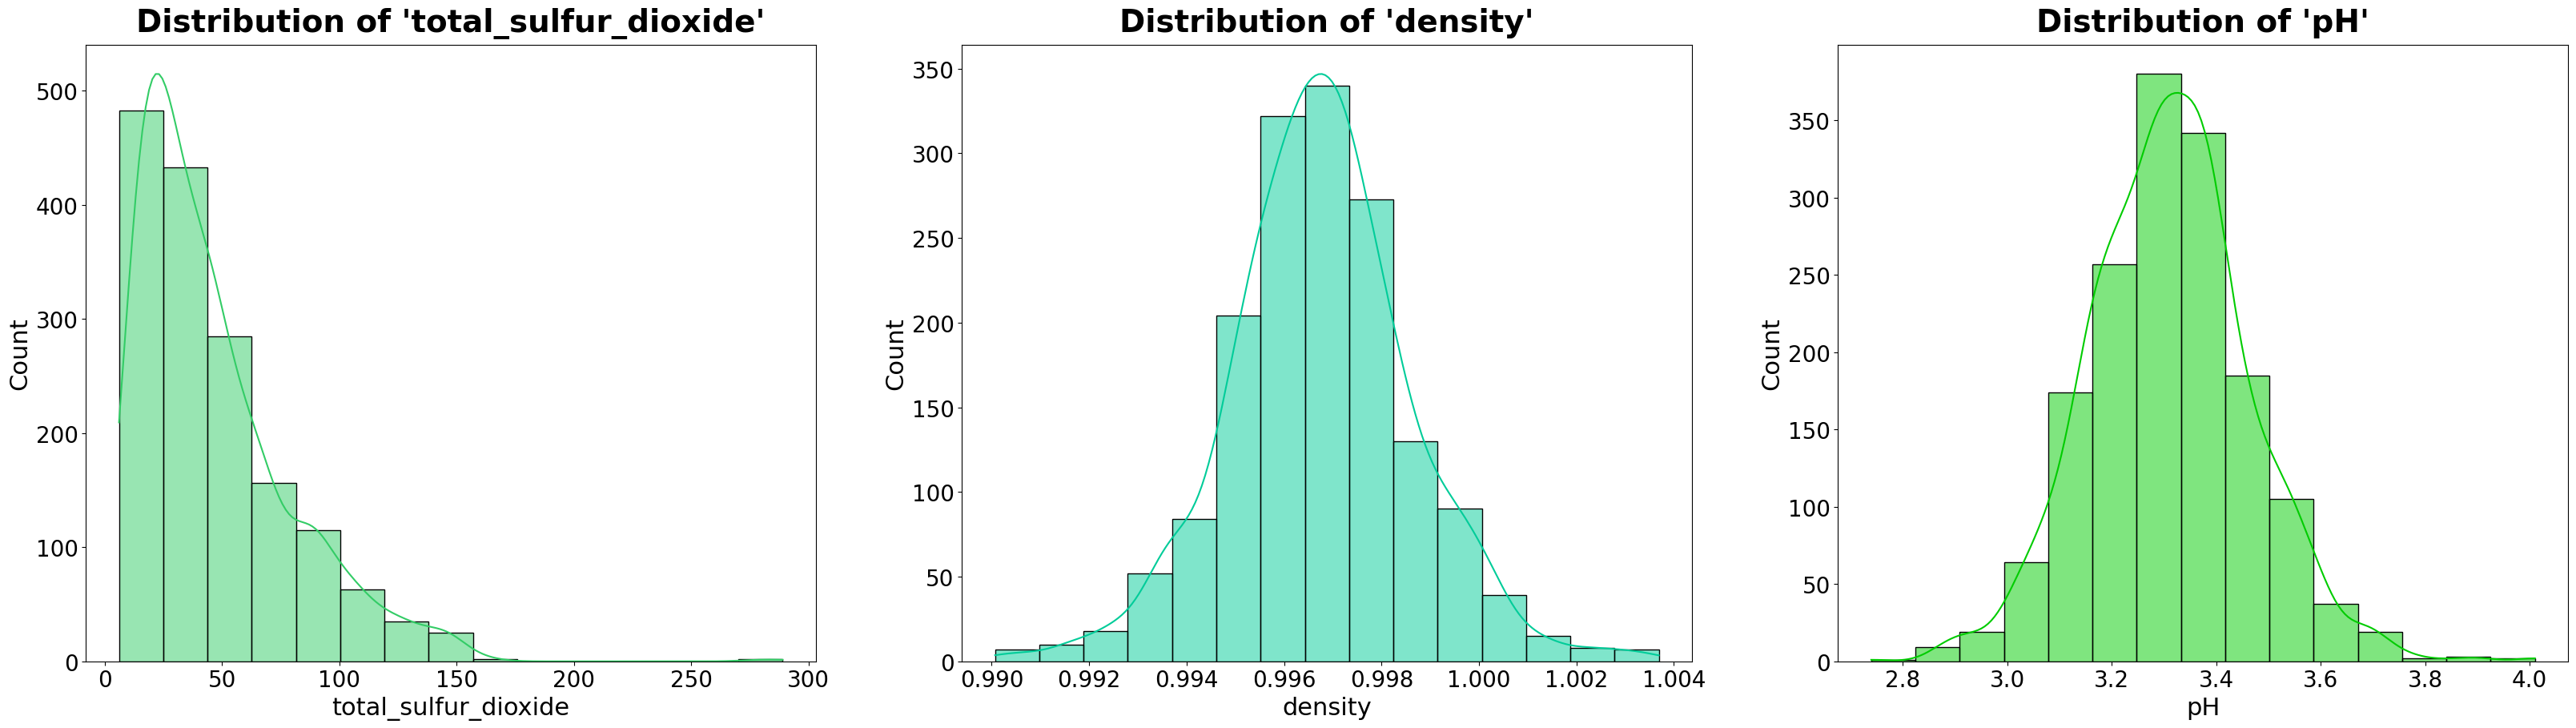

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))
sns.histplot(ax = axes[0], x = winequality_df["total_sulfur_dioxide"],
             bins = 15,
             kde = True,
             cbar = True,
             color = "#33CC66").set(title = "Distribution of 'total_sulfur_dioxide'")

sns.histplot(ax = axes[1], x = winequality_df["density"],
             bins = 15,
             cbar = True,
             kde = True,
             color = "#00CC99").set(title = "Distribution of 'density'")

sns.histplot(ax = axes[2], x = winequality_df["pH"],
             bins = 15,
             kde = True,   
             cbar = True,
             color = "#00CC00").set(title = "Distribution of 'pH'")

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=22)
    ax.set_ylabel(ax.get_ylabel(), fontsize=22)
    ax.set_title(ax.get_title(), fontsize=28, fontweight="bold", pad=12)

**Nhận xét:**
- Từ biểu đồ của total_sulfur_dioxide, density và pH ta thấy rằng độ phân bố bị lệch phải 
- Tuy nhiên cả 3 biểu đồ này đều khá cân đối
1. Đối với total_sulfur_dioxide các giá trị nằm trong khoảng $[0 - 30]$
2. Đối với density các giá trị nằm trong khoảng $[0.995 - 0.998]$
3. Đối với pH các giá trị nằm trong khoảng $[3.2 - 3.4]$

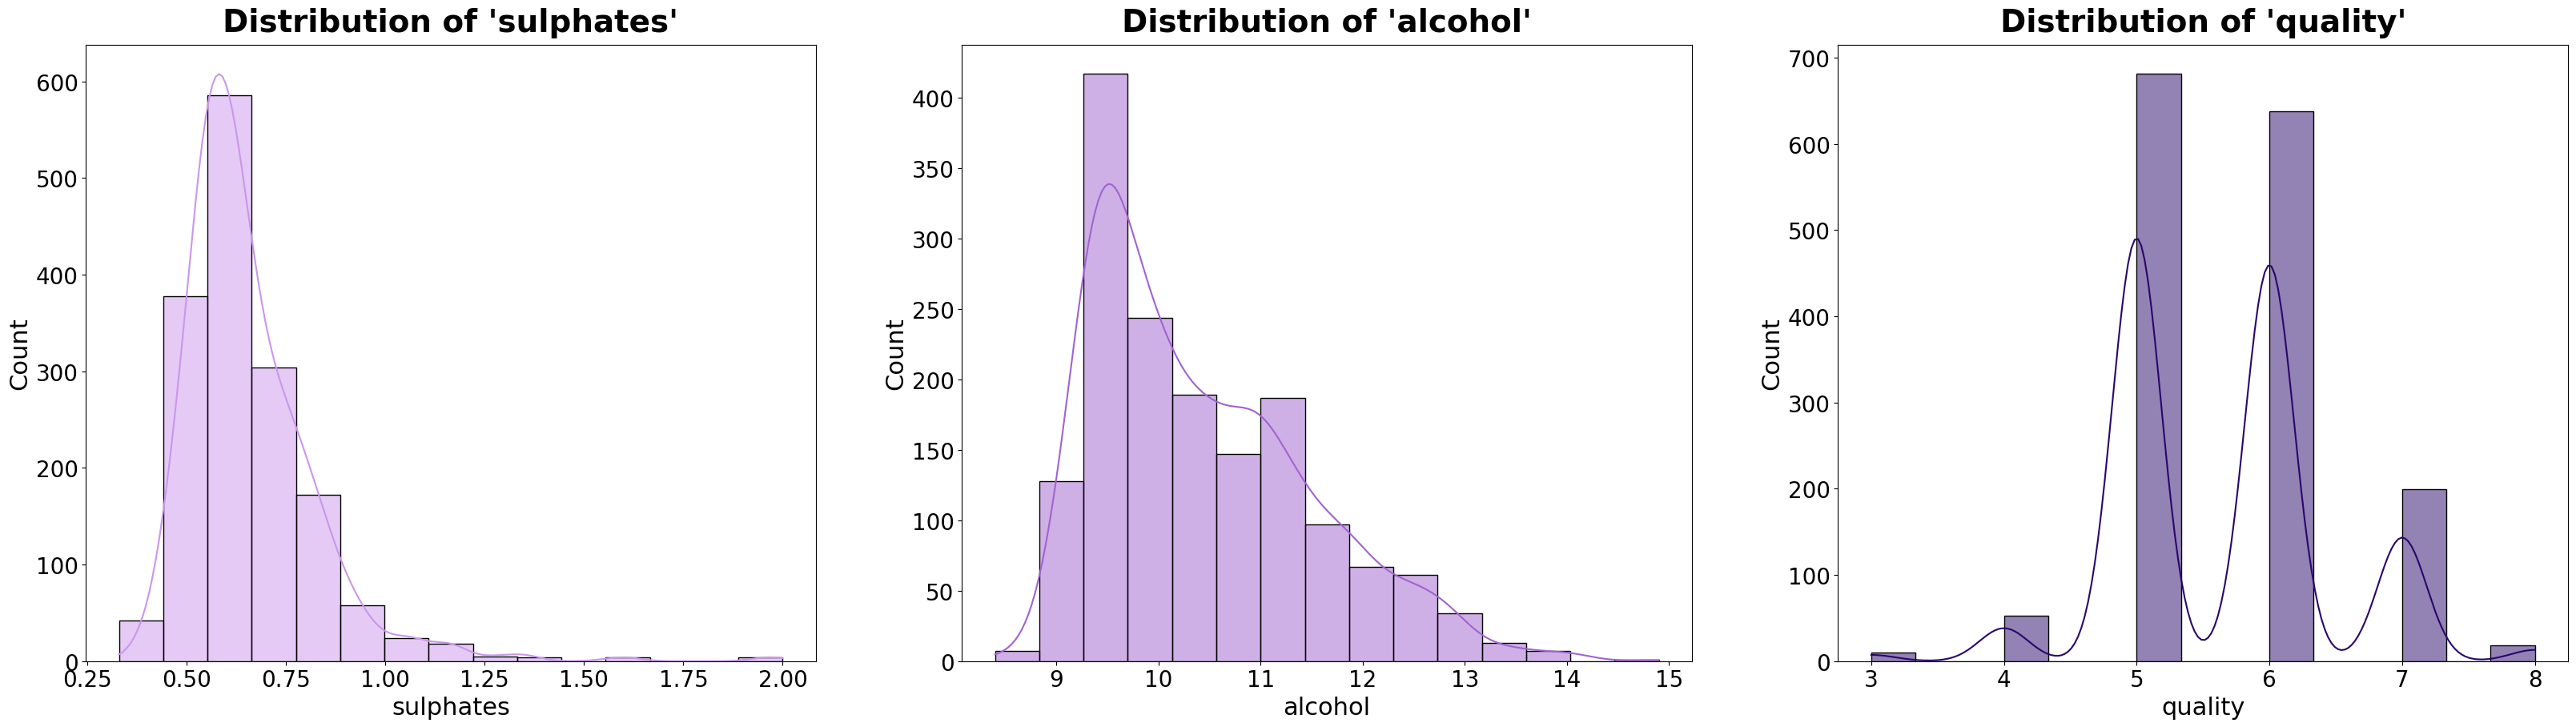

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))
sns.histplot(ax = axes[0], x = winequality_df["sulphates"],
             bins = 15,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'sulphates'")

sns.histplot(ax = axes[1], x = winequality_df["alcohol"],
             bins = 15,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'alcohol'")

sns.histplot(ax = axes[2], x = winequality_df["quality"],
             bins = 15,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'quality'")

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=22)
    ax.set_ylabel(ax.get_ylabel(), fontsize=22)
    ax.set_title(ax.get_title(), fontsize=28, fontweight="bold", pad=12)

**Nhận xét:**
- Từ biểu đồ của sulphates, alcohol ta thấy rằng độ phân bố bị lệch phải
- Tuy nhiên sulphates phân phối đều, đối với alcohol thì khá cân bằng. Ngoại trừ quality thì nhiều đỉnh khiến phân bố lộn xộn 
1. Đối với sulphates các giá trị nằm trong khoảng $[0.50 - 0.75]$
2. Đối với alcohol các giá trị nằm trong khoảng $[9 - 10]$
3. Đối với quality các giá trị nằm trong khoảng $5$ và $6$

3) Scatter

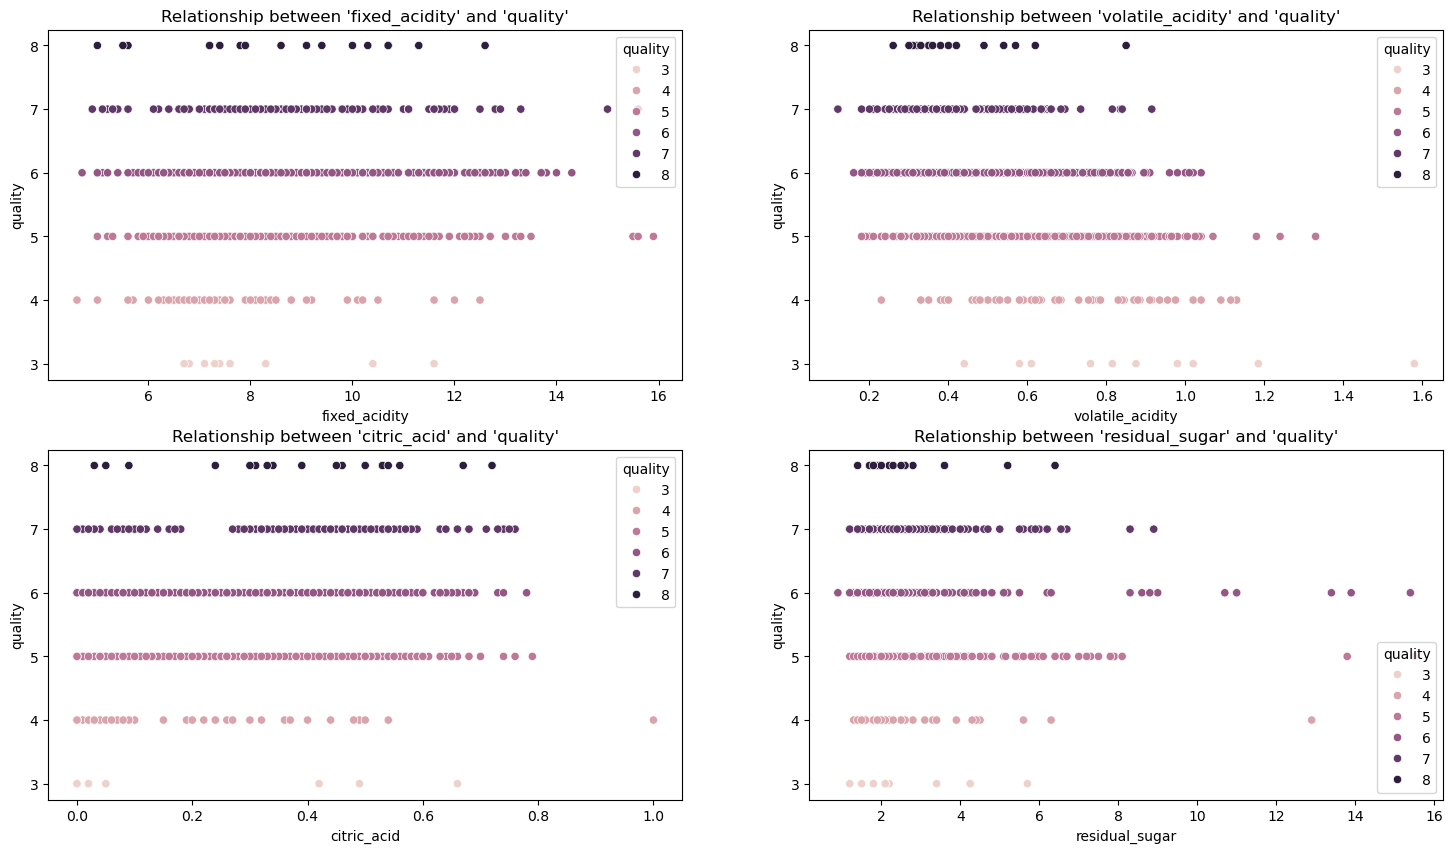

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "fixed_acidity",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'fixed_acidity' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "volatile_acidity",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'volatile_acidity' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "citric_acid",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'citric_acid' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "residual_sugar",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'residual_sugar' and 'quality'");

**Nhận xét**
- Fixed Acidity vs quality
    -	Đối với Fixed Acidity biểu đồ cho thấy sự phân tán rộng của các điểm dữ liệu. Các loại rượu có chất lượng từ thấp đến cao (cụ thể là từ 4 đến 7) xuất hiện trên toàn bộ dải giá trị của fixed_acidity, tuy nhiên với lượng Fixed Acidity [12-14 g/L] vẫn có tập trung chất lượng rượu khá (5,6). 

    => Axit cố định (Fixed Acidity) không phải là một yếu tố có ảnh hưởng rõ rệt hoặc một chỉ báo đáng tin cậy để dự đoán chất lượng rượu vang.
- Volatile Acidity vs quality
    -	Đối với Volatile Acidity biểu đồ thể hiện một mối tương quan nghịch (âm) rõ ràng. Các loại rượu có chất lượng cao (điểm 6, 7, 8) tập trung chủ yếu ở vùng có nồng độ volatile_acidity thấp (dưới 0.7), trong khi rượu chất lượng thấp hơn lại có xu hướng phân bố ở vùng nồng độ cao hơn.

    => Axit dễ bay hơi (Volatile Acidity) là một chỉ số quan trọng, ảnh hưởng tiêu cực đến chất lượng rượu. Về mặt hóa học, nồng độ cao của axit axetic (thành phần chính của volatile_acidity) sẽ tạo ra mùi giống giấm, một đặc tính không mong muốn, từ đó làm giảm chất lượng cảm quan của sản phẩm.
- Axit Citric vs quality
    -	Đối với Axit Citric mặc dù dữ liệu có độ phân tán, một xu hướng tương quan thuận (dương) có thể được nhận thấy. Cụ thể, khi nồng độ citric_acid vượt ngưỡng 0.5, mật độ các loại rượu có chất lượng cao tăng lên đáng kể.

    => Axit citric (Citric Acid) là một yếu tố có ảnh hưởng tích cực đến chất lượng rượu. Về mặt cảm quan, axit citric góp phần tạo nên sự tươi mát (freshness) và hương vị trái cây cho rượu, giúp nâng cao trải nghiệm của người dùng.
- Residual sugar vs quality
    -	Tương tự như fixed_acidity, biểu đồ của residual_sugar cho thấy các điểm dữ liệu phân tán rộng mà không tuân theo một quy luật hay xu hướng cụ thể nào.
    => Đường tồn dư (Residual Sugar) không cho thấy mối liên hệ rõ ràng với chất lượng rượu vang. Điều này cho thấy rằng vị ngọt không phải là yếu tố quyết định đến việc một loại rượu được đánh giá là ngon hay không trong tập dữ liệu này.



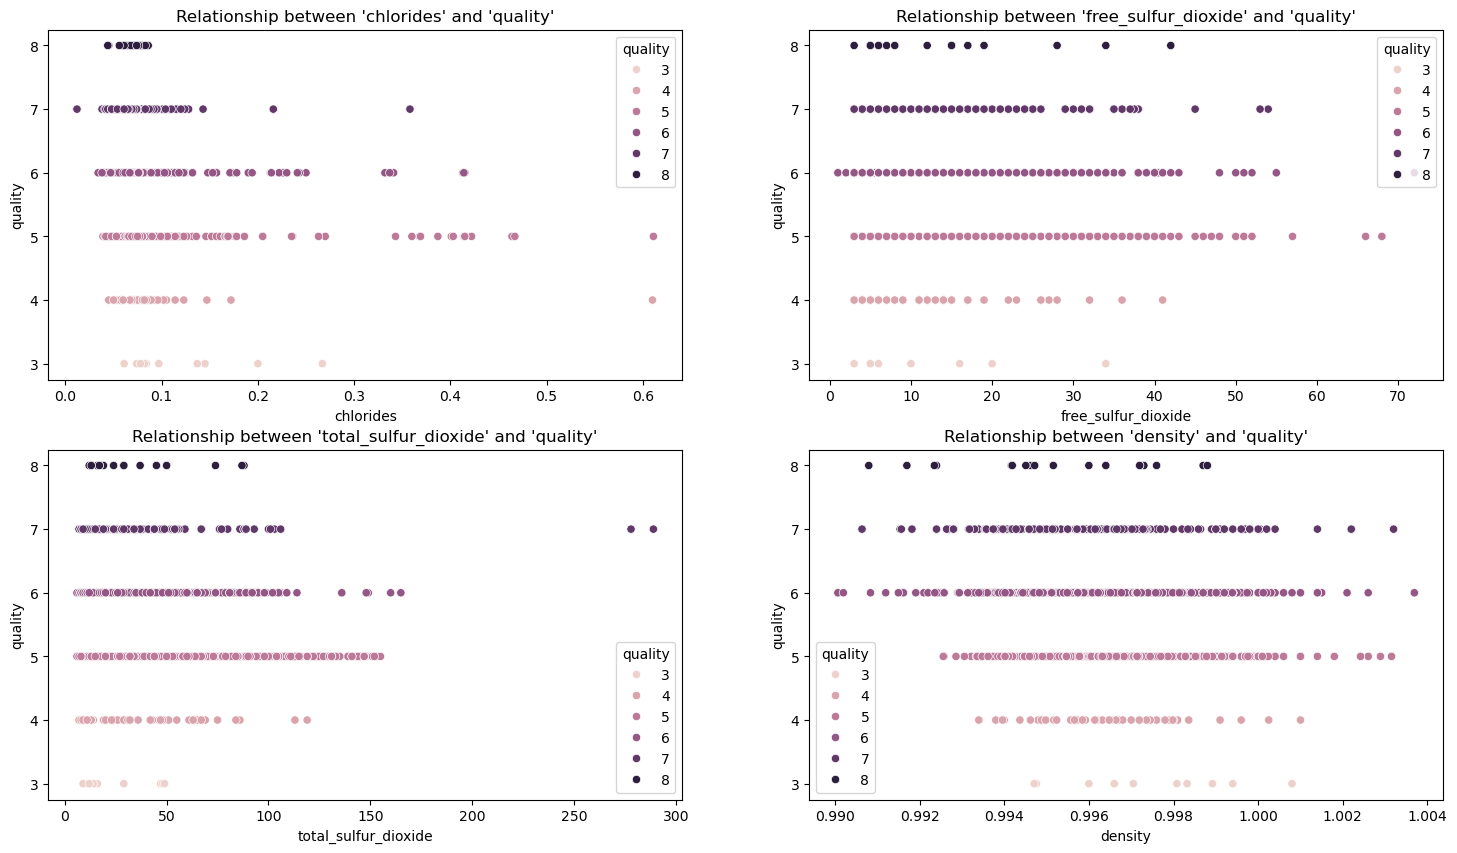

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "chlorides",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'chlorides' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "free_sulfur_dioxide",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'free_sulfur_dioxide' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "total_sulfur_dioxide",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'total_sulfur_dioxide' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "density",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'density' and 'quality'");

**Nhận xét:**
- Clorides vs quality
    -	Biểu đồ Clorides không cho thấy một mối tương quan. Các loại rượu có chất lượng từ thấp đến cao tuy tập trung vào nồng độ muối thấp (dưới 0.1 g/L) nhưng không cho thấy được là yếu tố gây ảnh hưởng đến chất lượng rượu.

    => Nồng độ muối là một yếu tố không ảnh hưởng đến chất lượng rượu.
- Free SO₂ vs quality
    -	Tương tự như fixed_acidity và residual_sugar, biểu đồ của free_SO₂ cho thấy các điểm dữ liệu phân tán rộng mà không hình thành một xu hướng rõ ràng. Ở mọi mức chất lượng, đều có sự hiện diện của rượu với hàm lượng SO₂ tự do từ thấp đến cao.
    
    => Dựa trên biểu đồ, lưu huỳnh đioxit tự do không phải là một yếu tố dự báo đáng tin cậy cho chất lượng rượu vang.
- Total SO₂ vs quality
    -	Mặc dù biểu đồ cũng cho thấy sự phân tán rộng, một khuynh hướng nhẹ có thể được nhận thấy. Tuy vậy nó vẫn không đánh giá được ảnh hưởng đến chất lượng rượu.
    
    => Tổng nồng độ SO₂ không phải là yếu tố ảnh hưởng đến chất lượng rượu. Tuy vào đó cần thắt chặt lượng SO₂ để đảm bảo an toàn sức khỏe người sử dụng 
- Density vs quality
    -	Biểu đồ thể hiện một mối tương quan nghịch rất rõ ràng và mạnh mẽ. Rượu chất lượng cao tập trung dày đặc ở vùng có tỷ trọng thấp (dưới 0.993 g/cm³), trong khi rượu chất lượng thấp hơn có xu hướng ở vùng tỷ trọng cao hơn.
    
    => Tỷ trọng là một yếu tố dự báo chất lượng quan trọng. Về mặt vật lý, tỷ trọng của rượu là một hàm số của hai thành phần chính: nồng độ cồn và đường tồn dư (đường làm tăng tỷ trọng). Như đã phân tích trước đó, rượu chất lượng cao thường có nồng độ cồn cao và lượng đường tồn dư không quá lớn. Sự kết hợp này dẫn đến tỷ trọng thấp hơn, biến density trở thành một chỉ báo tổng hợp hiệu quả cho chất lượng rượu.


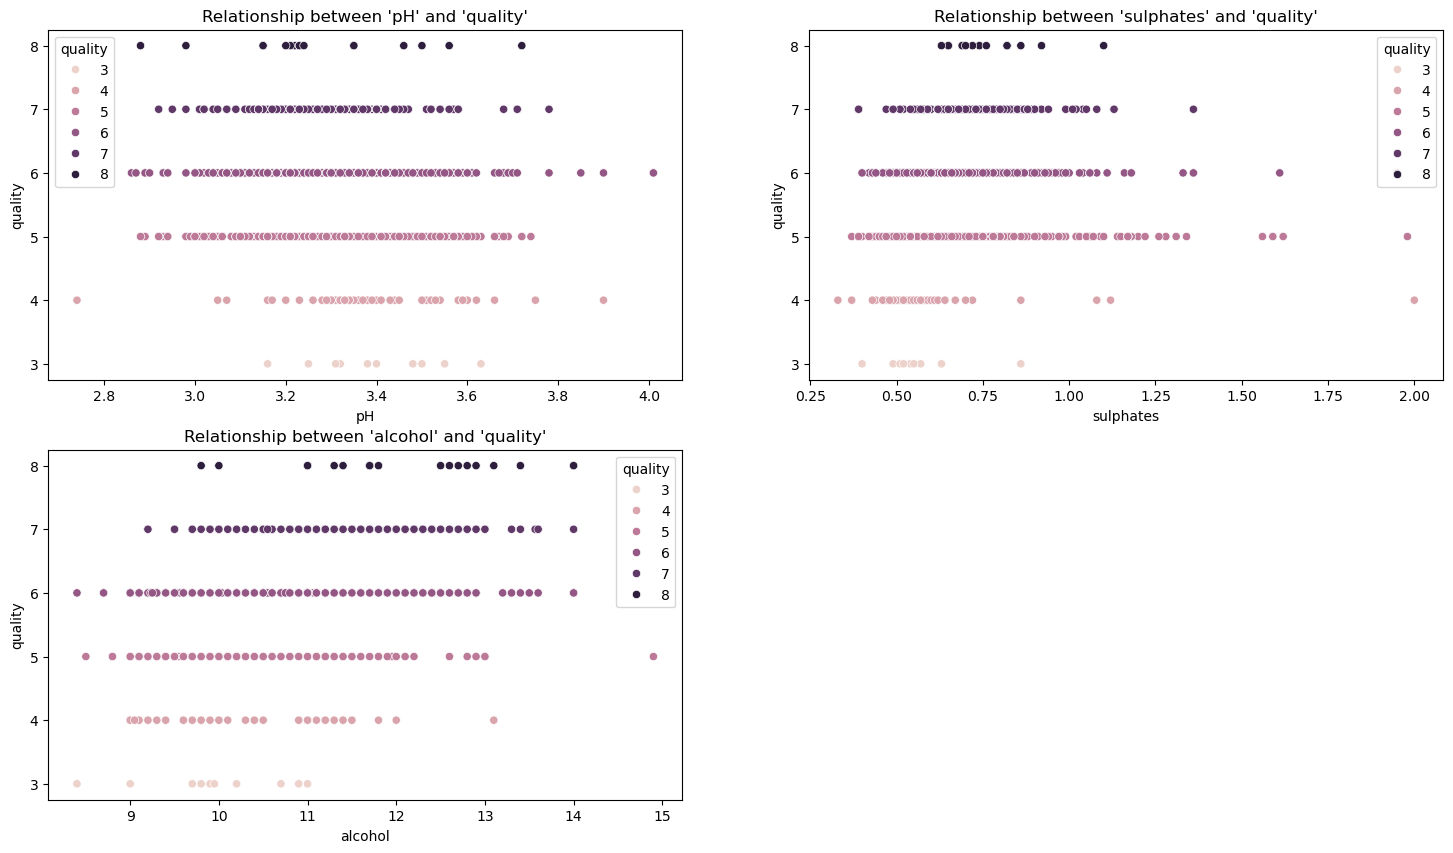

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "pH",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "sulphates",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'sulphates' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'alcohol' and 'quality'");
fig.delaxes(axes[3])

**Nhận xét:**
- Density vs quality
    -	Mặc dù trên toàn dải giá trị, độ pH không cho thấy một xu hướng tuyến tính rõ ràng, việc phân tích sâu hơn vào các khoảng cụ thể lại phát hiện ra một insight quan trọng. Trong khoảng pH từ 2.9 đến dưới 3.2, có một sự tập trung đáng chú ý của các loại rượu chất lượng cao và không có sự hiện diện của rượu chất lượng thấp.

    => Độ pH trong khoảng hẹp [2.9, 3.2] có thể là một yếu tố ảnh hưởng tích cực đến chất lượng. Điều này cho thấy một độ axit cao và được kiểm soát chặt chẽ có thể là điều kiện cần để đạt được chất lượng tốt. Yếu tố này cần được nghiên cứu sâu hơn để xác nhận đây là một "khoảng giá trị tối ưu".
- Sulphates vs quality
    -	Biểu đồ cho thấy một vùng các điểm dữ liệu rõ rệt. Trong khoảng nồng độ từ 0.75 đến 1.20 g/L, có sự tập trung mạnh mẽ của các loại rượu có chất lượng tốt (điểm 6, 7). Ngoài khoảng này, dữ liệu trở nên phân tán hơn.
    
    => Hàm lượng sunfat là một yếu tố có ảnh hưởng mạnh, đặc biệt trong khoảng [0.75, 1.20]. Về mặt hóa học, sunfat (SO₄²⁻) là một nguồn cung cấp SO₂, một chất bảo quản và chống oxy hóa quan trọng. Việc duy trì nồng độ sunfat trong khoảng tối ưu này có thể giúp bảo vệ hương vị và cấu trúc của rượu một cách hiệu quả nhất.
- Alcohol vs quality
    -	Tương tự các yếu tố trên, việc xác định khoảng giá trị quan trọng mang lại nhiều thông tin hơn là nhìn vào xu hướng chung. Dữ liệu cho thấy trong khoảng nồng độ cồn từ 11% đến 14%, có sự hội tụ của các loại rượu chất lượng từ trung bình đến cao.
    
    => Nồng độ cồn là một yếu tố then chốt, với khoảng tối ưu nằm trong khoảng [11%, 14%]. Nồng độ cồn cao ảnh hưởng đến cảm nhận về hương vị và sự cân bằng tổng thể. Việc đạt được nồng độ cồn trong khoảng này dường như là một yếu tố quan trọng để sản xuất ra rượu vang chất lượng.


**Từ tất cả các nhận định trên, ta phân chia các yếu tố thành các loại:**

| Ảnh hưởng mạnh                | Ảnh hưởng nhẹ             | Không ảnh hưởng  |
|------------------------------|---------------------------|------------------|
| `Volatile_acidity` \< 0.7    | `Fixed_acidity` 12–14     |`Chlorides`      |
| `Citric_acid` \> 0.5         | `Total_SO2` 70–120        | `Residual_Sugar` |
| `Sulphates` 0.75–1.20        | `Density` \< 0.993        | `Free_SO2`       |
| `Alcohol` 11–14              | `pH` 2.8–3.0              |                  |
